## Glioma Grading Clinical and Mutation Features Dataset

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report,cohen_kappa_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
from IPython.display import Markdown
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns', None)
import warnings

# Definir o nível de aviso para "ignore"
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv("dataset/TCGA_GBM_LGG_Mutations_all.csv")
df1 = pd.read_csv("dataset/TCGA_InfoWithGrade.csv")

In [44]:
df.head(5)

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


### Análise

#### 1- O primeiro passo ao analisar um conjunto de dados é entender quais perguntas eu posso responder com os dados que eu tenho. Para isso você pode analisar alguns pontos:
    - Este conjunto de dados permite algoritmos de classificação e regressão?
    - Quais colunas eu tenho na minha base de dados? e o que elas podem significar?
    - As colunas possuem correlações positivas ou negativas entre si?

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

Este dataset não tem dados nulos, mas tem dados duplicados?

In [46]:
df.duplicated().sum()

0

Como são os campos das colunas do dataset?


In [47]:
df.Race.value_counts()

white                               766
black or african american            59
not reported                         18
asian                                14
--                                    4
american indian or alaska native      1
Name: Race, dtype: int64

In [48]:
df.Grade.value_counts()

LGG    499
GBM    363
Name: Grade, dtype: int64

In [49]:
df.Primary_Diagnosis.value_counts()

Glioblastoma                     360
Astrocytoma, anaplastic          129
Mixed glioma                     128
Oligodendroglioma, NOS           108
Oligodendroglioma, anaplastic     75
Astrocytoma, NOS                  58
--                                 4
Name: Primary_Diagnosis, dtype: int64

In [50]:
df.Gender.value_counts()

Male      499
Female    359
--          4
Name: Gender, dtype: int64

In [51]:
df.IDH1.value_counts()

NOT_MUTATED    448
MUTATED        414
Name: IDH1, dtype: int64

Como fica claro, algumas colunas possuem "--" nos dados faltantes, com isso precisamos apagar essas linhas para deixar o dataset mais limpo e organizado.

In [52]:
df = df.replace('--', pd.NA)
df = df.dropna()
df = df.reset_index()
df.head(5)

,index,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


### Gráficos

Neste gráfico nós vemos a distribuição do sexo dos pacientes com relação a quantidade de casos por tipo de cancer.

##### Neste gráfico nós vemos a distribuição do sexo dos pacientes com relação a quantidade de casos por tipo de cancer. 

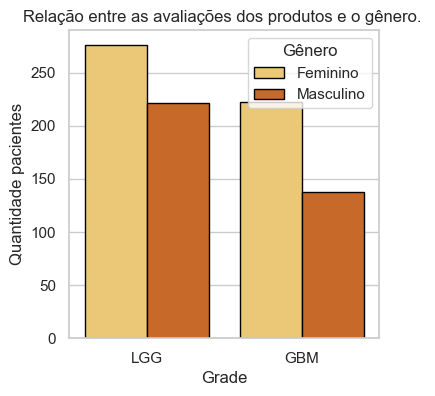

In [53]:
display(Markdown("##### Neste gráfico nós vemos a distribuição do sexo dos pacientes com relação a quantidade de casos por tipo de cancer. "))
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
sns.countplot(x='Grade', data = df, hue='Gender',palette='YlOrBr',edgecolor = "black")
plt.xlabel("Grade")
plt.ylabel("Quantidade pacientes")
plt.title("Relação entre as avaliações dos produtos e o gênero. ")
plt.legend(title='Gênero', loc='upper right', labels=['Feminino', 'Masculino'])
plt.show()

Faixa etária e o tipo de cancer

In [54]:
def age(value):
    value = value.split(' ')
    idade = int(value[0])
    return idade


def group_age(age):
    if(age>15 and age<=25):
        return "15-30 anos"
    elif(age>25 and age<=35):
        return "30-45 anos"
    elif(age>35 and age<=60):
        return "45-60 anos"
    else:
        return "60-100 anos"

df['age'] = df['Age_at_diagnosis'].apply(age)
df['group_age'] = df['age'].apply(group_age)

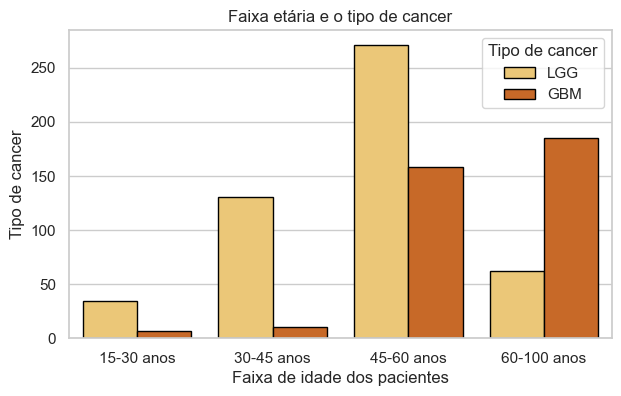

In [55]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,4))
sns.countplot(x='group_age', 
              data = df,
              hue='Grade',
              palette='YlOrBr',
              edgecolor = "black",
              order=['15-30 anos','30-45 anos','45-60 anos','60-100 anos'])
plt.xlabel("Faixa de idade dos pacientes")
plt.ylabel("Tipo de cancer")
plt.title("Faixa etária e o tipo de cancer")
plt.legend(title='Tipo de cancer', loc='upper right', labels=['LGG', 'GBM'])
plt.show()

### Categorização

Categorizando as váriaveis para o tipo numérico

In [56]:
def cat(value):
    if value == 'MUTATED':
        return 1
    elif value == 'NOT_MUTATED':
        return 0
    else:
        None

In [57]:
df_one_hot = df[['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']]

df_one_hot.head(3)

,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [58]:
df_one_hot = df_one_hot.applymap(cat)
df_one_hot.head(3)

,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Race

In [59]:
df['Race'].unique()

array(['white', 'asian', 'black or african american', 'not reported',
       'american indian or alaska native'], dtype=object)

In [60]:
df_one_hot['Race'] = df['Race'].map({'white':0,
                'asian':1,
                'black or african american':2,
                'not reported':3,
                'american indian or alaska native':4})

Gender

In [61]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [62]:
df_one_hot['Gender'] = df['Gender'].map({'Male':0,'Female':1})

Primary_Diagnosis

In [63]:
df['Primary_Diagnosis'].value_counts()

Glioblastoma                     360
Astrocytoma, anaplastic          129
Mixed glioma                     128
Oligodendroglioma, NOS           107
Oligodendroglioma, anaplastic     75
Astrocytoma, NOS                  58
Name: Primary_Diagnosis, dtype: int64

In [64]:
df_one_hot['Primary_Diagnosis'] = df['Primary_Diagnosis'].map({'Glioblastoma':0,
                            'Astrocytoma, anaplastic':1,
                            'Mixed glioma':2,
                            'Oligodendroglioma, NOS':3,
                            'Oligodendroglioma, anaplastic':4,
                            'Astrocytoma, NOS':5})

Age_at_diagnosis	

In [65]:
def age(value):
    value = value.split(' ')
    idade = int(value[0])
    return idade

def diagnosis(value):
    value = value.split(' ')
    if len(value)==4:
        diagnosticos = int(value[2])
    else:
        diagnosticos = 0
    return diagnosticos

In [66]:
df_one_hot['age'] = df['Age_at_diagnosis'].apply(age)
df_one_hot['diagnosis'] = df['Age_at_diagnosis'].apply(diagnosis)

Grade

In [67]:
df['Grade'].unique()

array(['LGG', 'GBM'], dtype=object)

In [68]:
df_one_hot['Grade'] = df['Grade'].map({'LGG':0,'GBM':1})

### Experimentos
Divisão dos dados em treino e teste

In [69]:
df_one_hot.head(5)

,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race,Gender,Primary_Diagnosis,age,diagnosis,Grade
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,51,108,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,38,261,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,35,62,0
3,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,32,283,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,31,187,0


In [70]:
y = df_one_hot['Grade']
X = df_one_hot.drop(columns=['Grade','Primary_Diagnosis'])
X = X.reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify=y)

#### GridSearch

In [71]:
parameters = {"C": np.logspace(-3,3,7), 
              "penalty": ["l1","l2","elasticnet"],
              "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'multi_class':['auto', 'ovr', 'multinomial'],
              }
classifier = LogisticRegression(max_iter=3000,random_state=12345)

In [72]:
grid_search_cv = GridSearchCV(classifier, parameters, n_jobs=-1, cv=5)
grid_search_cv.fit(X_train, y_train.ravel())
display(Markdown(f'\n- Best parameters found - {classifier.__class__.__name__}: {grid_search_cv.best_params_}'))

y_predict = grid_search_cv.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(list(y_test), list(y_predict), average='macro')
precision = precision_score(list(y_test), list(y_predict), average='macro')
recall = recall_score(list(y_test), list(y_predict), average='macro')
display(Markdown(f'\n- Acc: {acc*100}\n- F1 Score: {f1*100}\n- Precision: {precision*100}\n- Recall: {recall*100}\n'))


- Best parameters found - LogisticRegression: {'C': 10.0, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}


- Acc: 87.59689922480621
- F1 Score: 87.44907266646398
- Precision: 87.2649469623915
- Recall: 88.16666666666666


Função para treinar e avaliar os modelos

In [73]:
def train_models(X_train,X_test,y_train,y_test,model,name_model):
    model.fit(X_train, y_train)    
    predictions = model.predict(X_test)
    
    #Calcula as metricas do modelo
    acc = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions) * 100
    recall = recall_score(y_test, predictions) * 100
    f1 = f1_score(y_test, predictions) * 100
    conf_mat = confusion_matrix(y_test, predictions)
    metrics = {
        'Name Model':name_model,
        'Precision':precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': acc,
        'Confusion matrix':conf_mat,
        'Model': model
    }
    return metrics

#### K-fold

In [74]:
X = df_one_hot.drop(columns=['Grade','Primary_Diagnosis'])
y = df_one_hot['Grade']
kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
dataset_results = []
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_LR = LogisticRegression(solver='liblinear', penalty='l1', max_iter=3000, random_state=42, C=0.1,multi_class= 'auto')    
    metrics = train_models(X_train, X_test,y_train, y_test, model_LR, 'LR')
    dataset_results.extend([metrics])

In [75]:
dataset_results = pd.DataFrame(dataset_results)
dataset_results

,Name Model,Precision,Recall,F1-score,Accuracy,Confusion matrix,Model
0,LR,82.926829,94.444444,88.311688,89.534884,"[[43, 7], [2, 34]]","LogisticRegression(C=0.1, max_iter=3000, penal..."
1,LR,77.500000,86.111111,81.578947,83.720930,"[[41, 9], [5, 31]]","LogisticRegression(C=0.1, max_iter=3000, penal..."
2,LR,85.000000,94.444444,89.473684,90.697674,"[[44, 6], [2, 34]]","LogisticRegression(C=0.1, max_iter=3000, penal..."
3,LR,76.744186,91.666667,83.544304,84.883721,"[[40, 10], [3, 33]]","LogisticRegression(C=0.1, max_iter=3000, penal..."
4,LR,72.000000,100.000000,83.720930,83.720930,"[[36, 14], [0, 36]]","LogisticRegression(C=0.1, max_iter=3000, penal..."
5,LR,67.346939,91.666667,77.647059,77.906977,"[[34, 16], [3, 33]]","LogisticRegression(C=0.1, max_iter=3000, penal..."
6,LR,71.111111,88.888889,79.012346,80.232558,"[[37, 13], [4, 32]]","LogisticRegression(C=0.1, max_iter=3000, penal..."
7,LR,79.069767,94.444444,86.075949,87.058824,"[[40, 9], [2, 34]]","LogisticRegression(C=0.1, max_iter=3000, penal..."
8,LR,73.469388,100.000000,84.705882,84.705882,"[[36, 13], [0, 36]]","LogisticRegression(C=0.1, max_iter=3000, penal..."
9,LR,75.000000,91.666667,82.500000,83.529412,"[[38, 11], [3, 33]]","LogisticRegression(C=0.1, max_iter=3000, penal..."


Função para gerar a matriz de confusão

In [76]:
def matrix(matrix):
    """Plota uma matriz de confusão

    Args:
        matrix (array): Um Array referente a uma matriz de confusão de 2x2
    """
    plt.figure(figsize=(5,5))
    fig, ax = plt.subplots()
    sns.heatmap(matrix, annot=True, fmt="", cmap="Blues")
    ax.set_xticklabels(['LGG', 'GBM'])
    ax.set_yticklabels(['LGG', 'GBM'])
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title("Reviews")

#### Treinamento do modelo final

### Acurácia utilizando LogisticRegression e TFIDF: 83.52941176470588%

<Figure size 500x500 with 0 Axes>

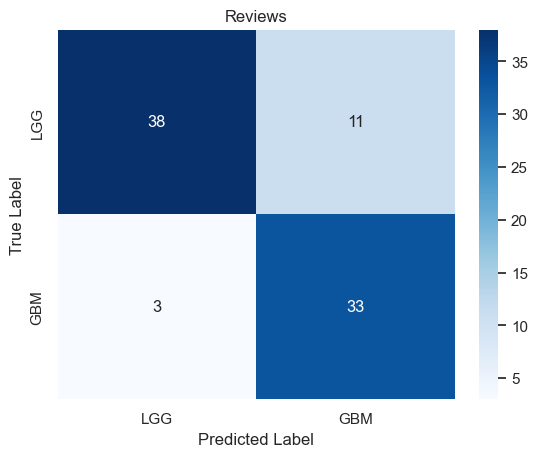

In [77]:
#Treina o classificador
model_LR = LogisticRegression(solver='liblinear', penalty='l1', max_iter=3000, random_state=42, C=0.1,multi_class= 'auto')
model_LR = model_LR.fit(X_train, y_train)

#Plota os resultados
pred_LR = model_LR.predict(X_test)
acc = accuracy_score(y_test,pred_LR) * 100
display(Markdown(f"### Acurácia utilizando LogisticRegression e TFIDF: {acc}%"))
matrix(confusion_matrix(y_test, pred_LR))